In [2]:
import tensorflow as tf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/Train'
valid_path = '/content/drive/MyDrive/Dataset/Test'

In [5]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [6]:
for layer in mobilnet.layers:
    layer.trainable = False

In [7]:
folders = glob('/content/drive/MyDrive/Dataset/Train*')

In [8]:
folders

['/content/drive/MyDrive/Dataset/Train']

In [9]:
x = Flatten()(mobilnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
from tensorflow.keras.layers import MaxPooling2D

In [13]:

### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [17]:
training_set.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [18]:
training_set

In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [20]:
test_set.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [21]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 121s 9s/step - loss: 2.1823 - accuracy: 0.5339 - val_loss: 0.6635 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 23s 2s/step - loss: 0.6198 - accuracy: 0.5794 - val_loss: 0.7311 - val_accuracy: 0.4403
Epoch 3/50
13/13 [==============================] - 22s 2s/step - loss: 0.5287 - accuracy: 0.7352 - val_loss: 0.8413 - val_accuracy: 0.4030
Epoch 4/50
13/13 [==============================] - 22s 2s/step - loss: 0.4107 - accuracy: 0.8093 - val_loss: 0.9174 - val_accuracy: 0.4701
Epoch 5/50
13/13 [==============================] - 23s 2s/step - loss: 0.3061 - accuracy: 0.8733 - val_loss: 0.5779 - val_accuracy: 0.6940
Epoch 6/50
13/13 [==============================] - 22s 2s/step - loss: 0.2587 - accuracy: 0.8935 - val_loss: 0.6443 - val_accuracy: 0.6791
Epoch 7/50
13/13 [==============================] - 22s 2s/step - loss: 0.1970 - accuracy: 0.9267 - val_loss: 0.4906 - val_accuracy: 0.7313
Epoch 8/50
13/13 [=

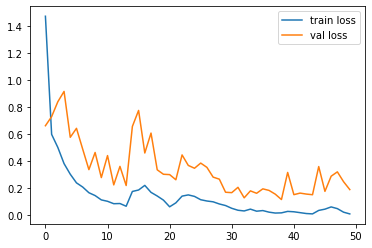

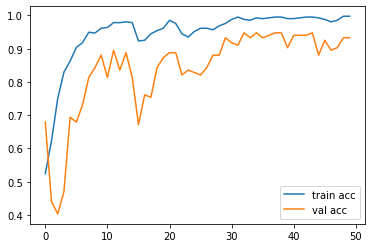

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random 
import os

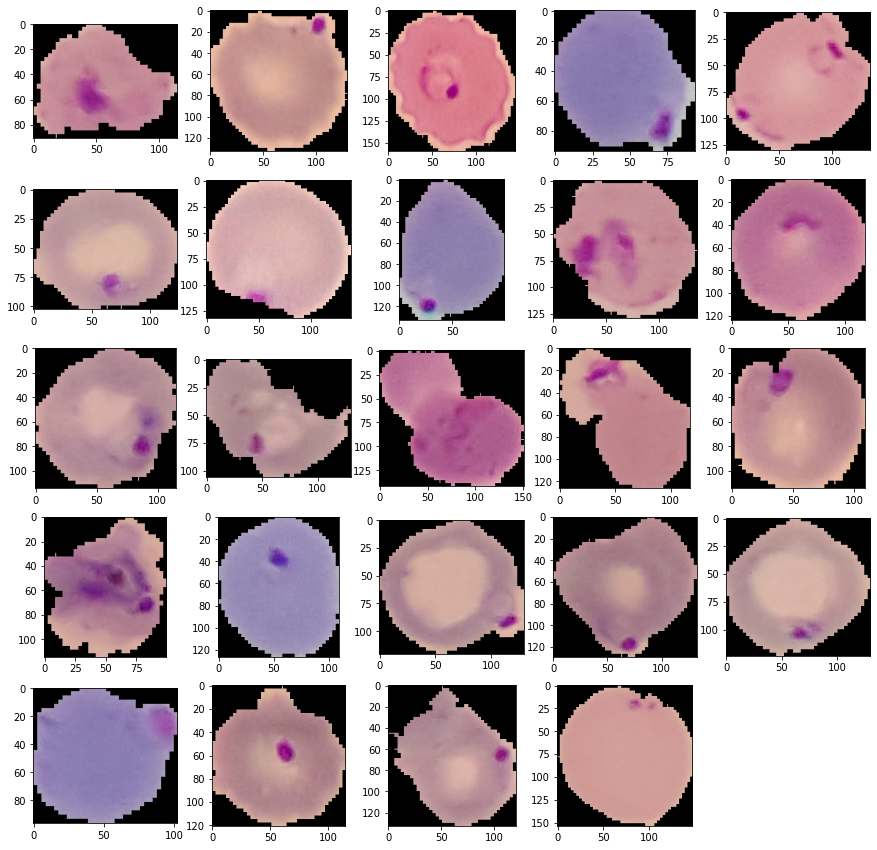

In [30]:
filenames = random.sample(os.listdir('/content/drive/MyDrive/Dataset/Train/Parasite') , 25)

##here we will see 25 images of Parasitized cell images
plt.figure(figsize=(15, 15))  # figure size
for i in range(1, len(filenames)):
    row = i
    image = imread('/content/drive/MyDrive/Dataset/Train/Parasite/' + filenames[i])
    plt.subplot(5, 5, row)
    plt.imshow(image)
plt.show()

In [31]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [32]:
y_pred = model.predict(test_set)

In [33]:
y_pred

array([[9.9952686e-01, 4.7320483e-04],
       [1.0000000e+00, 9.5541070e-27],
       [3.2581840e-02, 9.6741819e-01],
       [1.0000000e+00, 5.5026905e-10],
       [8.7422488e-04, 9.9912578e-01],
       [1.0000000e+00, 2.2173321e-19],
       [9.9999952e-01, 4.6968228e-07],
       [1.0000000e+00, 1.2278050e-13],
       [6.9662398e-01, 3.0337608e-01],
       [1.0000000e+00, 4.9211828e-13],
       [8.7067580e-01, 1.2932415e-01],
       [1.0000000e+00, 4.3751478e-16],
       [1.0000000e+00, 7.9856056e-15],
       [1.0000000e+00, 1.2472155e-14],
       [8.2113445e-03, 9.9178869e-01],
       [1.3579230e-03, 9.9864203e-01],
       [1.3755196e-03, 9.9862444e-01],
       [9.5342362e-04, 9.9904650e-01],
       [1.4546682e-03, 9.9854541e-01],
       [1.0000000e+00, 2.4453214e-15],
       [1.4199115e-03, 9.9858010e-01],
       [1.0000000e+00, 4.6159132e-13],
       [2.3830568e-03, 9.9761701e-01],
       [1.0000000e+00, 8.4939271e-14],
       [5.6575349e-04, 9.9943417e-01],
       [4.0569496e-03, 9.

In [34]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [35]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0])

In [36]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [37]:
model=load_model('model_vgg19.h5')

In [38]:

img=image.load_img('/content/drive/MyDrive/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163002_cell_13.png',target_size=(224,224))

In [39]:

x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [40]:
x.shape

(224, 224, 3)

In [41]:
x=x/255


In [42]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [43]:

model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [44]:
a=np.argmax(model.predict(img_data), axis=1)

In [45]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


In [ ]:
model.save('/content/drive/MyDrive/model_vgg19.h5')

In [ ]:
from inference import predict


In [ ]:
predict("/content/drive/MyDrive/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_10.png")

['Uninfected']